<p style="font-family: Arial; font-size:2.5em;color:purple; font-style:bold"><br>
Using ROC and AUC to evaluate classification models<br><br>Week 11
</p><br> 

### A ROC/AUC (Receiver Operating Characteristic/Area Under the Curve) plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity.

### The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity.

### To evaluate the model, predictions are made on the test set. A classification model naturally produces class probabilities that give an indication of likelihood for each class. While it is common to use a 50% cutoff to make hard class predictions, the performance derived from this default might be misleading. 

### To avoid applying a probability cutoff, a technique called the receiver operating characteristic (ROC) curve is used. The ROC curve evaluates the results on all possible cutoffs and plots the true positive rate versus the false positive rate. 

### The best possible curve is one that is shifted as close as possible to the upper left corner while an ineffective model will stay along the dashed diagonal line. A common summary value for this technique is to use the area under the ROC curve where a value of 1.0 corresponds a perfect model while values near 0.5 are indicative of a model with no predictive ability. 

c:\users\wzeng\appdata\local\continuum\anaconda3\envs\wz\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


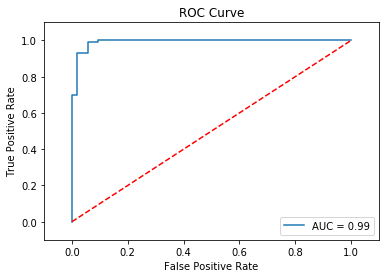

In [9]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# load data
dataset = load_breast_cancer()

X = dataset.data
y = dataset.target

   
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# model can be any trained classifier that supports predict_proba()
clf = LogisticRegression()
clf.fit(X_train, Y_train)

y_preds = clf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()